<a href="https://colab.research.google.com/github/eutiagovski/projetos-cursos/blob/main/datascience-mentorama/13_Clusterizacao_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clusterização

###Aula 1: KMeans

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

In [3]:
X, _ = make_blobs(n_samples=300, centers=[[0,0],[1,0],[0.75, 1.25]], cluster_std=2.5, random_state=0)
X.shape

(300, 2)

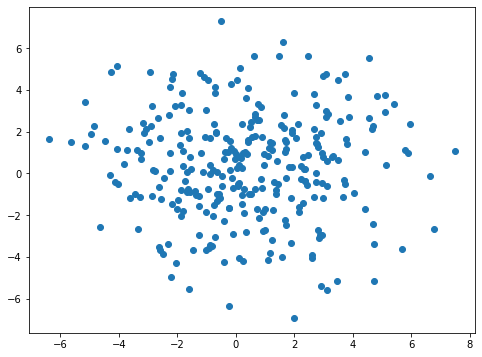

In [4]:
plt.figure(figsize=[8,6])
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
km = KMeans(n_clusters=3)

In [6]:
km.fit(X)

KMeans(n_clusters=3)

In [7]:
km.cluster_centers_

array([[-2.07752202,  1.23661076],
       [ 0.69715675, -2.42092729],
       [ 2.44712932,  2.03618266]])

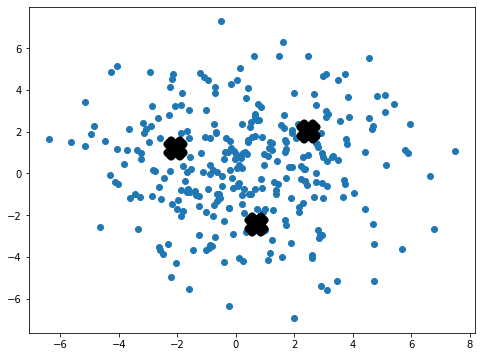

In [8]:
plt.figure(figsize=[8,6])
plt.scatter(X[:,0], X[:,1])
for center in km.cluster_centers_:
  plt.scatter(center[0], center[1], s=300, marker='X', c='black', lw=7)
plt.show()

In [10]:
km.predict(X)

array([2, 2, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1,
       1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2,
       2, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 2, 0, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2,
       1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0,
       1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1], d

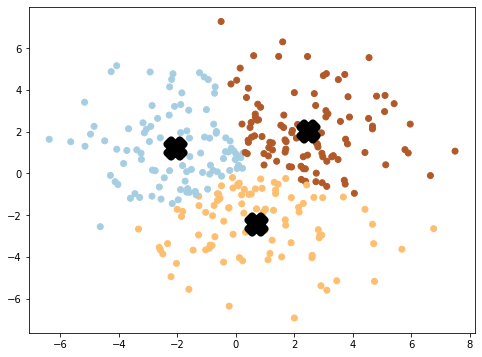

In [12]:
plt.figure(figsize=[8,6])
plt.scatter(X[:,0], X[:,1], c=km.predict(X), cmap=plt.cm.Paired)
for center in km.cluster_centers_:
  plt.scatter(center[0], center[1], s=300, marker='X', c='black', lw=7)
plt.show()

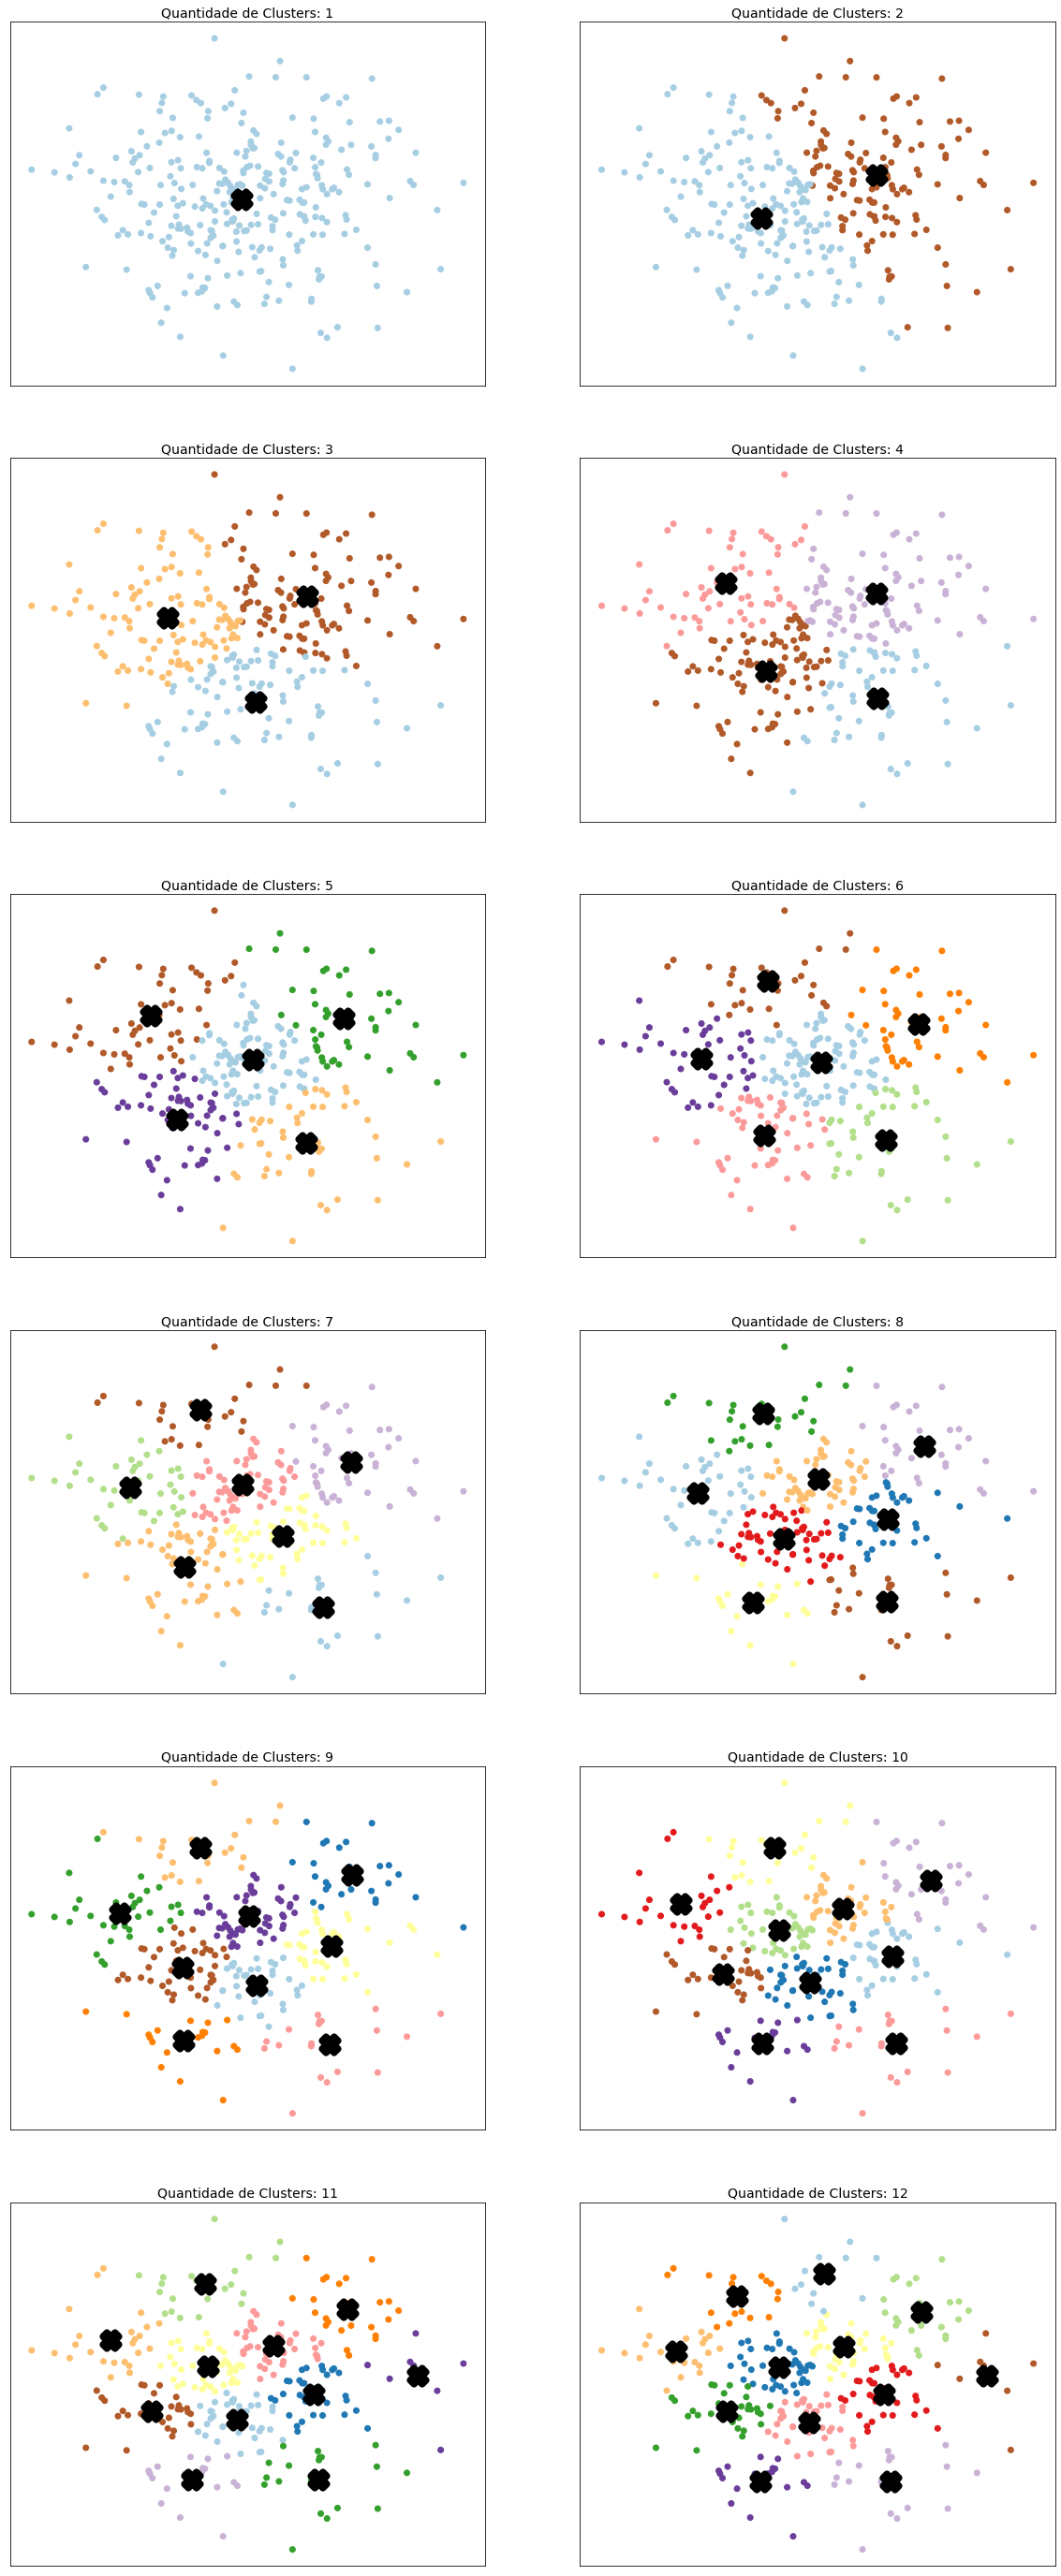

In [13]:
plt.figure(figsize=[20,50])

for k in range(1,13):
  km = KMeans(n_clusters=k)
  km.fit(X)
  
  plt.subplot(6,2,k)
  plt.title(f'Quantidade de Clusters: {k}', fontsize=14)
  plt.scatter(X[:,0], X[:,1], c=km.predict(X), cmap=plt.cm.Paired)
  
  for center in km.cluster_centers_:
    plt.scatter(center[0], center[1], s=300, marker='X', c='black', lw=7)
  
  plt.xticks([])
  plt.yticks([])
plt.show()

##Aula 2: Interpretação do KMeans

Métrica: WCSS

In [14]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/countries of the world.csv')

In [15]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [42]:
dff = df[['Country', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)']].copy()
dff.columns = ['pais', 'mortalidade_infantil', 'renda_per_capta']
dff

,pais,mortalidade_infantil,renda_per_capta
0,Afghanistan,"163,07",700.0
1,Albania,"21,52",4500.0
2,Algeria,31,6000.0
3,American Samoa,"9,27",8000.0
4,Andorra,"4,05",19000.0
...,...,...,...
222,West Bank,"19,62",800.0
223,Western Sahara,NaN,NaN
224,Yemen,"61,5",800.0
225,Zambia,"88,29",800.0


In [43]:
dff.mortalidade_infantil =  dff.mortalidade_infantil.apply(lambda s: str(s).replace(',', '.')).astype(float)
dff

,pais,mortalidade_infantil,renda_per_capta
0,Afghanistan,163.07,700.0
1,Albania,21.52,4500.0
2,Algeria,31.00,6000.0
3,American Samoa,9.27,8000.0
4,Andorra,4.05,19000.0
...,...,...,...
222,West Bank,19.62,800.0
223,Western Sahara,NaN,NaN
224,Yemen,61.50,800.0
225,Zambia,88.29,800.0


In [52]:
dff = dff.dropna()

In [44]:
from sklearn.preprocessing import StandardScaler

In [54]:
X_norm = StandardScaler().fit_transform(dff.values[:, 1:])

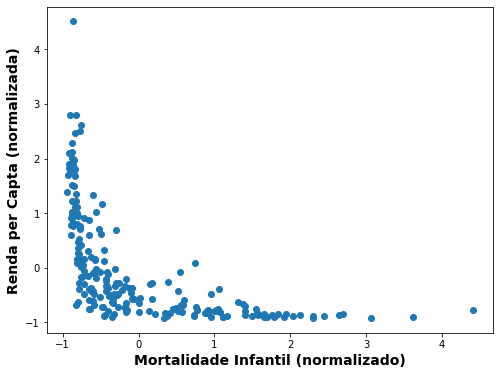

In [55]:
plt.figure(figsize=[8,6])
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.xlabel('Mortalidade Infantil (normalizado)', fontweight='bold', fontsize=14)
plt.ylabel('Renda per Capta (normalizada)', fontweight='bold', fontsize=14)
plt.show()

In [56]:
dff.corr()

,mortalidade_infantil,renda_per_capta
mortalidade_infantil,1.000000,-0.600774
renda_per_capta,-0.600774,1.000000


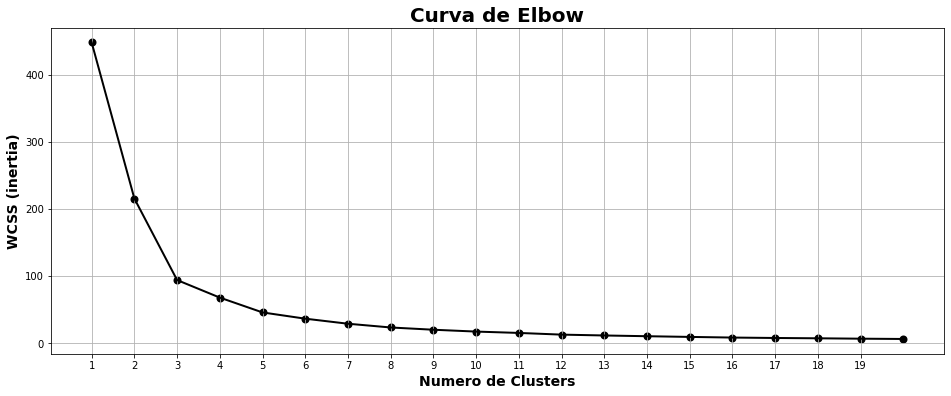

In [57]:
l = []

for k in range(1, 21):
  km = KMeans(n_clusters=k)
  km.fit(X_norm)
  l.append(km.inertia_)

plt.figure(figsize=[16,6])
plt.title('Curva de Elbow', fontweight='bold', fontsize=20)
plt.xlabel('Numero de Clusters', fontweight='bold', fontsize=14)
plt.ylabel('WCSS (inertia)', fontweight='bold', fontsize=14)

plt.plot(range(1, 1+len(l)), l, c='black', lw=2)
plt.scatter(range(1, 1+len(l)), l, c='black', lw=2)

plt.xticks(range(1, len(l)))
plt.grid()
plt.show()

In [58]:
km = KMeans(n_clusters=3).fit(X_norm)
dff['km3'] = km.predict(X_norm)

dff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pais,mortalidade_infantil,renda_per_capta,km3
0,Afghanistan,163.07,700.0,0
1,Albania,21.52,4500.0,1
2,Algeria,31.00,6000.0,1
3,American Samoa,9.27,8000.0,1
4,Andorra,4.05,19000.0,2
...,...,...,...,...
220,Virgin Islands,8.03,17200.0,2
222,West Bank,19.62,800.0,1
224,Yemen,61.50,800.0,0
225,Zambia,88.29,800.0,0


In [84]:
dff.loc[dff.pais == 'Brazil '].km3.values[0]

1

In [85]:
dff.loc[dff.pais == 'France '].km3.values[0]

2

In [86]:
dff.loc[dff.pais == 'Afghanistan '].km3.values[0]

0

In [88]:
print('Países no mesmo grupo que o Brasil: \n')
print(dff.loc[dff.km3 == dff.loc[dff.pais == 'Brazil '].km3.values[0]].pais.values)

Países no mesmo grupo que o Brasil: 

['Albania ' 'Algeria ' 'American Samoa ' 'Anguilla ' 'Antigua & Barbuda '
 'Argentina ' 'Armenia ' 'Belarus ' 'Belize ' 'Bolivia '
 'Bosnia & Herzegovina ' 'Botswana ' 'Brazil ' 'Bulgaria ' 'Cape Verde '
 'Chile ' 'China ' 'Colombia ' 'Costa Rica ' 'Croatia ' 'Cuba '
 'Dominica ' 'Dominican Republic ' 'East Timor ' 'Ecuador ' 'Egypt '
 'El Salvador ' 'Estonia ' 'Fiji ' 'French Guiana ' 'Gabon ' 'Gaza Strip '
 'Georgia ' 'Ghana ' 'Grenada ' 'Guadeloupe ' 'Guatemala ' 'Guyana '
 'Honduras ' 'Hungary ' 'Indonesia ' 'Iran ' 'Iraq ' 'Jamaica ' 'Jordan '
 'Kazakhstan ' 'Kiribati ' 'Korea, North ' 'Kyrgyzstan ' 'Latvia '
 'Lebanon ' 'Libya ' 'Lithuania ' 'Macedonia ' 'Malaysia '
 'Marshall Islands ' 'Martinique ' 'Mauritius ' 'Mexico '
 'Micronesia, Fed. St. ' 'Moldova ' 'Montserrat ' 'Morocco ' 'Namibia '
 'Nauru ' 'Netherlands Antilles ' 'Nicaragua ' 'N. Mariana Islands '
 'Oman ' 'Palau ' 'Panama ' 'Papua New Guinea ' 'Paraguay ' 'Peru '
 'Philippines 

In [89]:
print('Países no mesmo grupo que o France: \n')
print(dff.loc[dff.km3 == dff.loc[dff.pais == 'France '].km3.values[0]].pais.values)

Países no mesmo grupo que o France: 

['Andorra ' 'Aruba ' 'Australia ' 'Austria ' 'Bahamas, The ' 'Bahrain '
 'Barbados ' 'Belgium ' 'Bermuda ' 'British Virgin Is. ' 'Brunei '
 'Canada ' 'Cayman Islands ' 'Cyprus ' 'Czech Republic ' 'Denmark '
 'Faroe Islands ' 'Finland ' 'France ' 'French Polynesia ' 'Germany '
 'Gibraltar ' 'Greece ' 'Greenland ' 'Guam ' 'Guernsey ' 'Hong Kong '
 'Iceland ' 'Ireland ' 'Isle of Man ' 'Israel ' 'Italy ' 'Japan '
 'Jersey ' 'Korea, South ' 'Kuwait ' 'Liechtenstein ' 'Luxembourg '
 'Macau ' 'Malta ' 'Monaco ' 'Netherlands ' 'New Caledonia '
 'New Zealand ' 'Norway ' 'Portugal ' 'Puerto Rico ' 'Qatar '
 'San Marino ' 'Singapore ' 'Slovenia ' 'Spain ' 'Sweden ' 'Switzerland '
 'Taiwan ' 'United Arab Emirates ' 'United Kingdom ' 'United States '
 'Virgin Islands ']


In [90]:
print('Países no mesmo grupo que o Afghanistan: \n')
print(dff.loc[dff.km3 == dff.loc[dff.pais == 'Afghanistan '].km3.values[0]].pais.values)

Países no mesmo grupo que o Afghanistan: 

['Afghanistan ' 'Angola ' 'Azerbaijan ' 'Bangladesh ' 'Benin ' 'Bhutan '
 'Burkina Faso ' 'Burma ' 'Burundi ' 'Cambodia ' 'Cameroon '
 'Central African Rep. ' 'Chad ' 'Comoros ' 'Congo, Dem. Rep. '
 'Congo, Repub. of the ' "Cote d'Ivoire " 'Djibouti ' 'Equatorial Guinea '
 'Eritrea ' 'Ethiopia ' 'Gambia, The ' 'Guinea ' 'Guinea-Bissau ' 'Haiti '
 'India ' 'Kenya ' 'Laos ' 'Lesotho ' 'Liberia ' 'Madagascar ' 'Malawi '
 'Maldives ' 'Mali ' 'Mauritania ' 'Mayotte ' 'Mongolia ' 'Mozambique '
 'Nepal ' 'Niger ' 'Nigeria ' 'Pakistan ' 'Rwanda ' 'Senegal '
 'Sierra Leone ' 'Somalia ' 'South Africa ' 'Sudan ' 'Swaziland '
 'Tajikistan ' 'Tanzania ' 'Togo ' 'Turkmenistan ' 'Uganda ' 'Uzbekistan '
 'Vanuatu ' 'Yemen ' 'Zambia ' 'Zimbabwe ']


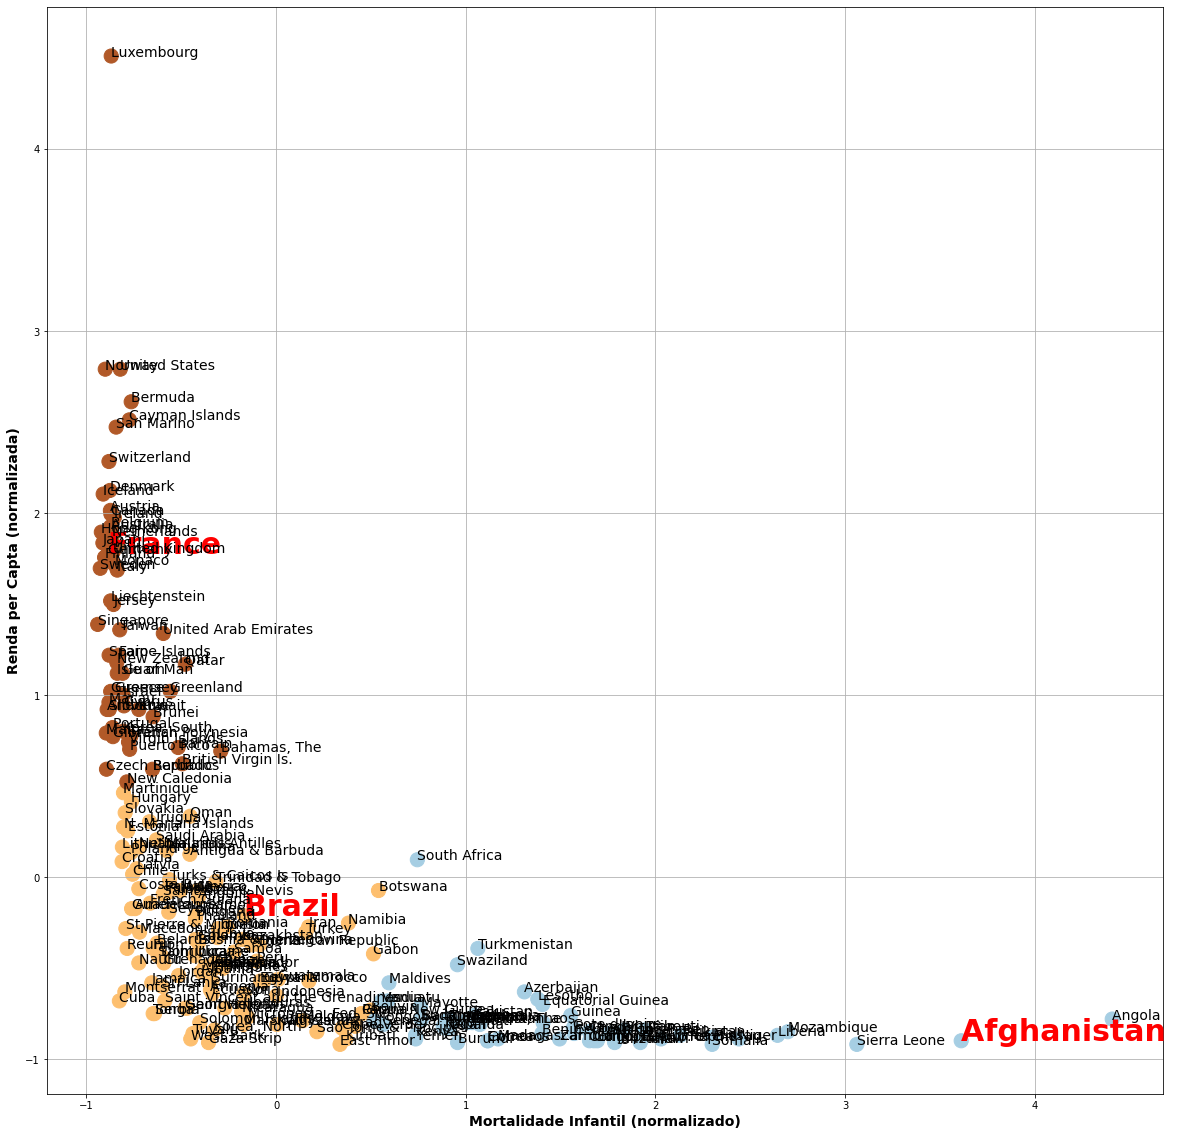

In [92]:
z = X_norm[:, 0]
y = X_norm[:, 1]

plt.figure(figsize=[20,20])

for i, txt in enumerate(dff.pais.values):
  if txt in ['Brazil ', 'France ', 'Afghanistan ']:
    plt.annotate(txt, (z[i], y[i]), fontsize=30, fontweight='bold', color='red')
  else:
    plt.annotate(txt, (z[i], y[i]), fontsize=14)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=dff.km3, s=200, cmap=plt.cm.Paired)
plt.xlabel('Mortalidade Infantil (normalizado)', fontweight='bold', fontsize=14)
plt.ylabel('Renda per Capta (normalizada)', fontweight='bold', fontsize=14)
plt.grid()
plt.show()